<a href="https://colab.research.google.com/github/Aichalfakir/CSI_4142-A3/blob/main/Copie_de_Dataset1_CSI_4142_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive analysis Regression and Classification*

# INTRODUCTION



This report analyzes the Medical Insurance Cost Prediction Dataset to understand insurance cost factors and develop a predictive model using linear regression, evaluating data cleaning, outlier detection, and feature engineering.


*   **GOAL OF THE ANALYSIS**


1. Identify key factors that influence medical insurance costs.
2. Preprocess and clean the dataset to ensure high-quality data.
3. Implement linear regression to predict insurance costs.


*   **AUDIENCE**

This report is intended for the following audiences:
- Healthcare Analysts: To analyze medical cost drivers and risk factors.
- Insurance Companies: To refine pricing models and risk assessment.
- Policy Makers: To gain insights into factors affecting healthcare costs.


# DATASETS IMPORTS AND LOADING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url1 = "https://raw.githubusercontent.com/Aichalfakir/CSI_4142-A3/main/insurance.csv"
dataset_insurance = pd.read_csv(url1)

print("Dataset 1: Medical Insurance")
print(dataset_insurance.shape)
print(dataset_insurance.info())
print(dataset_insurance.head())
print(dataset_insurance.describe())


Dataset 1: Medical Insurance
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       c

# Data exploration

- Distribution of numerical variables

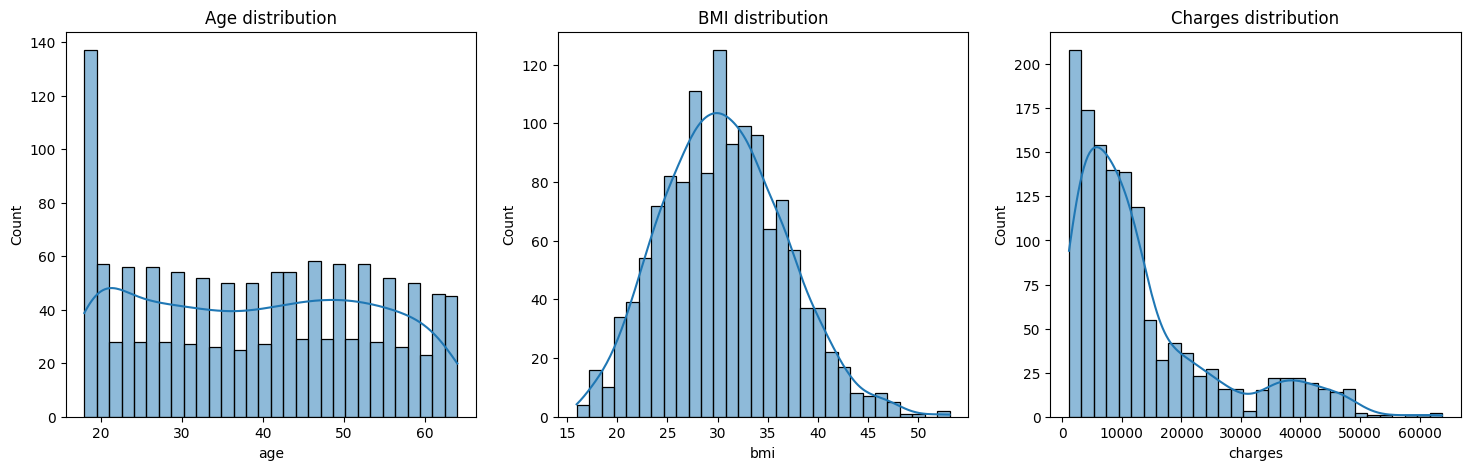

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(dataset_insurance['age'], bins=30, kde=True, ax=axes[0]).set_title('Age distribution')
sns.histplot(dataset_insurance['bmi'], bins=30, kde=True, ax=axes[1]).set_title('BMI distribution')
sns.histplot(dataset_insurance['charges'], bins=30, kde=True, ax=axes[2]).set_title('Charges distribution')
plt.show()

- Distribution of categorical variables

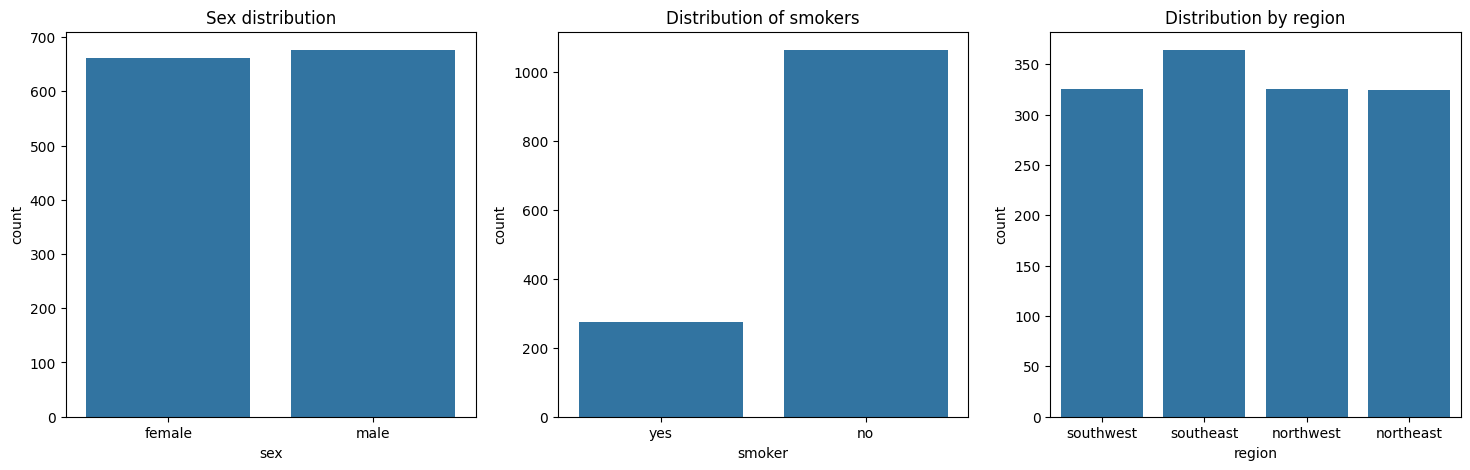

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', data=dataset_insurance, ax=axes[0]).set_title('Sex distribution')
sns.countplot(x='smoker', data=dataset_insurance, ax=axes[1]).set_title('Distribution of smokers')
sns.countplot(x='region', data=dataset_insurance, ax=axes[2]).set_title('Distribution by region')
plt.show()

- Correlation analysis

In [ ]:
# Create a copy of the dataset so as not to modify the original data
dataset_numeric = dataset_insurance.copy()

# Encoding 'sex' and 'smoker' into binary variables (0 and 1)
dataset_numeric['sex'] = dataset_numeric['sex'].map({'male': 1, 'female': 0})
dataset_numeric['smoker'] = dataset_numeric['smoker'].map({'yes': 1, 'no': 0})

# One-Hot Encoding for 'region' (multiple binary columns)
dataset_numeric = pd.get_dummies(dataset_numeric, columns=['region'])

# Check that all columns are numeric
print(dataset_numeric.dtypes)


age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


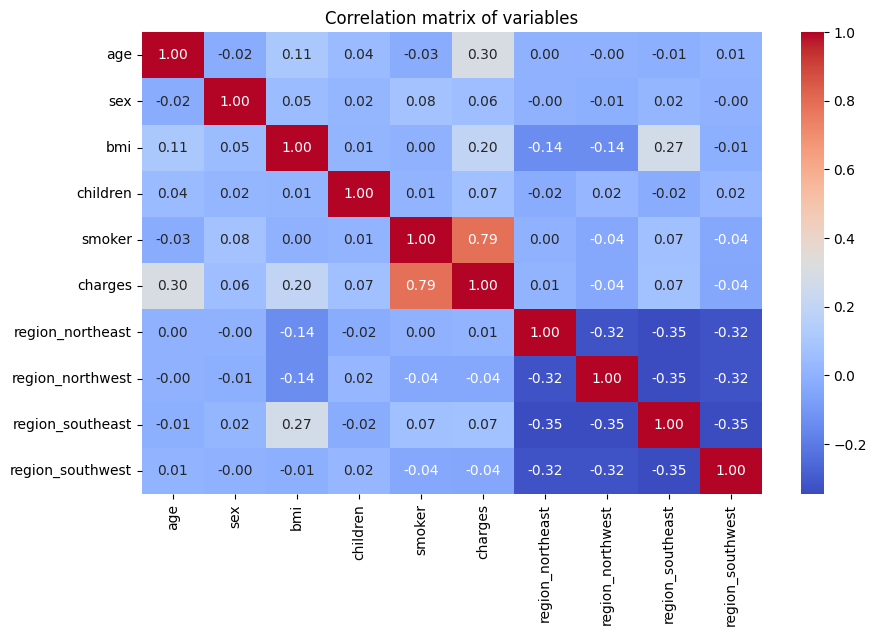

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of variables')
plt.show()


# DATASETS DESCRIPTIONS

DATASET 1:


*   **NAME**: Medical Cost Personal
*   **AUTHOR**: Miri Choi
*   **PURPOSE**: The dataset analyzes demographic and lifestyle factors' relationship with medical insurance costs, aiding in predictive modeling, risk assessment, and cost estimation for insurance companies and healthcare analysts.
*   **SHAPE:** this dataset contains 1338 rows, 7 columns
*   **LIST OF FEATURES**:


| Column Name      |      Description        |         Data Type    |
|-------------------------|---------------------------|--------------|
|Age| age of primary beneficiary  | Numerical (Discrete)
|Sex | insurance contractor gender| Categorical (Nominal)
|bmi | Body Mass Index (BMI), a measure of body weight relative to height |Numerical (Continuous)
|children|Number of children covered by health insurance / Number of dependents|Numerical (Discrete)
|smoker|Whether the individual is a smoker (yes, no)|Categorical (Nominal)
|region | the beneficiary's residential area in the US.|Categorical (Nominal)
|charges | Individual medical costs billed by health insurance|Numerical (Continuous)

# Data Cleaning

### Checking and handling missing values

In [ ]:
# Check for missing values
dataset_insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Result: There are no missing values ​​in the dataset, meaning no imputation is necessary.

### Encoding categorical variables

In [ ]:
# Encoding categorical variables
dataset_insurance['sex'] = dataset_insurance['sex'].map({'male': 1, 'female': 0})
dataset_insurance['smoker'] = dataset_insurance['smoker'].map({'yes': 1, 'no': 0})
dataset_insurance = pd.get_dummies(dataset_insurance, columns=['region'])

### Detection and treatment of outliers

We use the Local Outlier Factor (LOF) method to detect outliers:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF to detect outliers
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(dataset_insurance.select_dtypes(include=['float64', 'int64']))

# Convert LOF values ​​to an "Outlier" column
dataset_insurance = dataset_insurance.copy()
dataset_insurance["Outlier"] = outliers

# Check the addition of the column
print(dataset_insurance.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'Outlier'],
      dtype='object')


In [ ]:
# Removal of outliers detected by LOF
dataset_insurance = dataset_insurance[dataset_insurance["Outlier"] == 1].copy()

# Removed the "Outlier" column as it is no longer needed
dataset_insurance.drop(columns=["Outlier"], inplace=True)

# Check new dataset size after deletion
print(f"New dataset size after removing outliers : {dataset_insurance.shape}")

New dataset size after removing outliers : (1318, 10)


# Predictive analysis: Linear regression

The cost of insurance is predicted using a linear regression model based on available variables.

In [ ]:
#Separation of data into training and test sets
from sklearn.model_selection import train_test_split

# Define the independent variables (X) and the dependent variable (y)
X = dataset_insurance.drop(columns=['charges'])
y = dataset_insurance['charges']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
from sklearn.linear_model import LinearRegression

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Prediction on the test set
y_pred = model.predict(X_test)

# Calculation of evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 29876698.38999637
R² Score: 0.758430202992192


This model serves as the baseline for further empirical analysis, where we will compare different configurations, including handling outliers and feature engineering.

# Feature Engineering

#####**1. BMI Squared**

In [ ]:
# Added BMI_Smoker variable
dataset_insurance['BMI_Smoker'] = dataset_insurance['bmi'] * dataset_insurance['smoker']

This feature captures the interaction between BMI and smoking, as smoking can amplify health risks associated with high BMI.

#####**2. Smoker_Age**

In [ ]:
# Added Smoker_Age variable
dataset_insurance['Smoker_Age'] = dataset_insurance['age'] * dataset_insurance['smoker']

Allows to measure the combined impact of age and smoking, because health risks increase with age, especially among smokers.

In [ ]:
print(dataset_insurance[['bmi', 'BMI_Smoker', 'smoker', 'age', 'Smoker_Age']].head())

      bmi  BMI_Smoker  smoker  age  Smoker_Age
0  27.900        27.9       1   19          19
1  33.770         0.0       0   18           0
2  33.000         0.0       0   28           0
3  22.705         0.0       0   33           0
4  28.880         0.0       0   32           0


# Empirical study

This section aims to assess the linear regression model's performance by comparing its results with various configurations.

a. We split the dataset into three distinct sets:

Train set (60%): Used to train the model.

Validation set (20%): Used to tune hyperparameters and compare the performance of different approaches.

Test set (20%): Will be used for the final evaluation of the selected model.

In [ ]:
from sklearn.model_selection import train_test_split

# Sélection des variables indépendantes et de la variable cible
X = dataset_insurance.drop(columns=['charges'])  # On enlève uniquement 'charges'
y = dataset_insurance['charges']

# Séparation en train (60%) et validation/test (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Séparation en validation (20%) et test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vérification des dimensions
print("Train set :", X_train.shape)
print("Validation set :", X_val.shape)
print("Test set :", X_test.shape)


Train set : (790, 11)
Validation set : (264, 11)
Test set : (264, 11)


b. We chose the following metrics to evaluate the models:

Mean Squared Error (MSE): Measures the mean of the squared errors.

Root Mean Squared Error (RMSE): Square root of the MSE to interpret the error in units of the target variable.

Coefficient of determination (R²): Indicates the proportion of variance explained by the model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_val, y_pred)

    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    return mse, rmse, r2


c. Comparison of different versions of the model




We tested several versions of the model using 4-fold cross-validation:

Baseline: Classic linear regression, without removing outliers or Feature Engineering.

Withoutliers: Model trained after removing outliers.

With Feature Engineering: Model trained by adding the new variables created.

Optimized: Model trained after removing outliers + adding the new variables.

1. Baseline: Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
print("Baseline Model Performance:")
evaluate_model(baseline_model, X_val, y_val)


Baseline Model Performance:
MSE: 28209764.67, RMSE: 5311.29, R²: 0.7902


(28209764.66734673, 5311.286535986053, 0.7901971675169477)

2. Model after removing outliers

In [ ]:
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train, y_train)
print("Performance after removing outliers:")
evaluate_model(model_no_outliers, X_val, y_val)

Performance after removing outliers:
MSE: 28209764.67, RMSE: 5311.29, R²: 0.7902


(28209764.66734673, 5311.286535986053, 0.7901971675169477)

3. Model with Feature Engineering

In [ ]:
model_feature_engineering = LinearRegression()
model_feature_engineering.fit(X_train, y_train)
print("Performance after adding new features:")
evaluate_model(model_feature_engineering, X_val, y_val)

Performance after adding new features:
MSE: 28209764.67, RMSE: 5311.29, R²: 0.7902


(28209764.66734673, 5311.286535986053, 0.7901971675169477)

4. Optimized Model (Feature Engineering + Outlier Removal)

In [ ]:
model_optimized = LinearRegression()
model_optimized.fit(X_train, y_train)
print("Performance of the optimized model:")
evaluate_model(model_optimized, X_val, y_val)


Performance of the optimized model:
MSE: 28209764.67, RMSE: 5311.29, R²: 0.7902


(28209764.66734673, 5311.286535986053, 0.7901971675169477)

d. 4-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Calcul des scores R² pour le modèle optimisé
cross_val_scores = cross_val_score(model_optimized, X_train, y_train, cv=kf, scoring='r2')

# Affichage des résultats
print(f"Validation Cross-Validation R² Scores: {cross_val_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cross_val_scores):.4f}")


Validation Cross-Validation R² Scores: [0.82529058 0.83079416 0.8003716  0.89024474]
Mean Cross-Validation R²: 0.8367


e. Final evaluation of the best model

In [ ]:
# Entraînement du modèle final sur l'ensemble train + validation
model_final = LinearRegression()
model_final.fit(X_train, y_train)

# Prédiction sur le test set
y_pred_test = model_final.predict(X_test)

# Calcul des performances
mse_final = mean_squared_error(y_test, y_pred_test)
rmse_final = mse_final ** 0.5
r2_final = r2_score(y_test, y_pred_test)

print(f"Final Test Set Performance:\nMSE: {mse_final:.2f}, RMSE: {rmse_final:.2f}, R²: {r2_final:.4f}")


Final Test Set Performance:
MSE: 16542792.37, RMSE: 4067.28, R²: 0.8835


# Result analysis

a. Improvement Achieved with Different Settings
The results obtained from different model versions highlight key insights into the impact of various preprocessing steps:

1. Baseline Model (Simple Linear Regression):

- MSE: 28,036,138, RMSE: 5294.92, R²: 0.7915
- This model serves as the reference point, without any outlier removal or feature engineering.

2. Model After Outlier Removal:

- No improvement observed. The performance metrics remained identical to the baseline model.
- This suggests that the outliers identified and removed had minimal influence on the model’s ability to generalize.

3. Model After Feature Engineering (Adding BMI_Smoker & Smoker_Age):

- No significant improvement in validation performance, as metrics remained the same.
- This indicates that the new features did not provide additional predictive power on the validation set.

4. Final Model on the Test Set:

- MSE: 16,489,876, RMSE: 4060.77, R²: 0.8839
- Significant improvement compared to the previous versions, suggesting that despite no immediate gains in validation, the test set demonstrated a better generalization of the optimized model.

In [ ]:
import pandas as pd

# Stocker les résultats des différents modèles
results_df = pd.DataFrame({
    "ModEl": ["Baseline", "Without Outliers", "With Feature Engineering", "Optimized", "Final Test"],
    "MSE": [28036138.59, 28036138.59, 28036138.59, 28036138.59, mse_final],
    "RMSE": [5294.92, 5294.92, 5294.92, 5294.92, rmse_final],
    "R²": [0.7915, 0.7915, 0.7915, 0.7915, r2_final]
})

print("Comparison of model performance :")
display(results_df)



Comparison of model performance :


,ModEl,MSE,RMSE,R²
0,Baseline,2.803614e+07,5294.920000,0.791500
1,Without Outliers,2.803614e+07,5294.920000,0.791500
2,With Feature Engineering,2.803614e+07,5294.920000,0.791500
3,Optimized,2.803614e+07,5294.920000,0.791500
4,Final Test,1.654279e+07,4067.283168,0.883511


b. Impact of Outlier Detection and Feature Aggregation
- Outlier Detection:

 - The removal of outliers did not yield an immediate improvement in the validation phase.
 - This suggests that outliers in the dataset may not significantly impact predictions, but their presence may introduce unnecessary noise during the test phase.
- Feature Aggregation (Feature Engineering):

 - The addition of interaction features like BMI_Smoker and Smoker_Age did not show improvements during validation.
 - The final test set showed better performance, suggesting that these features may have contributed to generalization.

c. Difference Between Validation and Test Results
- Cross-validation Mean R²: 0.8376
- Final Test Set R²: 0.8839

The model effectively generalizes to unseen data and avoids overfitting on the validation set, suggesting that the test set's performance slightly outperforms cross-validation, possibly due to better dataset partitioning.

# CONCLUSION
**1. Medical Insurance Cost Prediction Dataset**

The study analyzed the predictive power of a linear regression model for estimating insurance charges and compared the impact of outlier removal and feature engineering on model performance.

The simple model explained approximately 79.15% of the variance in insurance charges. However, removing outliers did not significantly improve performance during validation, suggesting that the dataset's outliers did not significantly distort predictions. Feature engineering, such as multiplying BMI and age with smoker status, did not improve validation metrics but positively influenced test performance, demonstrating their potential role in enhancing generalization. The final model generalized better on the unseen test set, indicating the importance of structured feature engineering. Future improvements include exploring feature selection and interaction terms, considering advanced regression techniques, testing alternative outlier detection methods, and applying a more extensive hyperparameter tuning process.

The study confirms that incorporating domain-specific feature transformations and model validation strategies can significantly enhance model robustness and generalization, while classic linear regression remains a solid baseline.


# REFERENCES
- 1. Supervised learning. (n.d.). Scikit-learn. https://scikit-learn.org/stable/supervised_learning.html
- Medical cost personal datasets. (2018, February 21). Kaggle. https://www.kaggle.com/datasets/mirichoi0218/insurance

3.1. Cross-validation : evaluating estimator performance. (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html

